In [1]:
import numpy as np
import h5py

f = h5py.File("/oak/stanford/groups/akundaje/avsec/basepair/data/"
              +"processed/comparison/output/nexus,peaks,OSNK,0,10"
              +",1,FALSE,same,0.5,64,25,0.004,9,FALSE,[1,50],TRUE"
              +",FALSE,1/deeplift.imp_score.h5", "r")
nanog_mask = np.array(f['metadata']['interval_from_task'][:]=='Nanog')
nanog_profile_wn_hypimp = np.array(f["hyp_imp/Nanog/profile/wn"][:])[nanog_mask]
onehot_seq = np.array(f["inputs/seq"][:])[nanog_mask]
nanog_profile_wn_contribs = nanog_profile_wn_hypimp*onehot_seq

In [11]:
import modisco
track_set = modisco.tfmodisco_workflow.workflow.prep_track_set(
    task_names=["Nanog_profile_wn"],
    contrib_scores={'Nanog_profile_wn': nanog_profile_wn_contribs},
    hypothetical_contribs={'Nanog_profile_wn': nanog_profile_wn_hypimp},
    one_hot=onehot_seq)
grp = h5py.File("/oak/stanford/groups/akundaje/avsec/basepair/data/processed/comparison/output/nexus"
                +",peaks,OSNK,0,10,1,FALSE,same,0.5,64,25,0.004,9,FALSE,[1,50],TRUE,FALSE,1/deeplift"
                +"/Nanog/out/profile/wn/modisco.h5","r")
loaded_tfmodisco_results =\
    modisco.tfmodisco_workflow.workflow.TfModiscoResults.from_hdf5(grp, track_set=track_set)
grp.close()
patterns = (loaded_tfmodisco_results
            .metacluster_idx_to_submetacluster_results["metacluster_0"]
            .seqlets_to_patterns_result.patterns)

In [15]:
len(loaded_tfmodisco_results.multitask_seqlet_creation_results.final_seqlets)

98300

pattern idx 0
4011


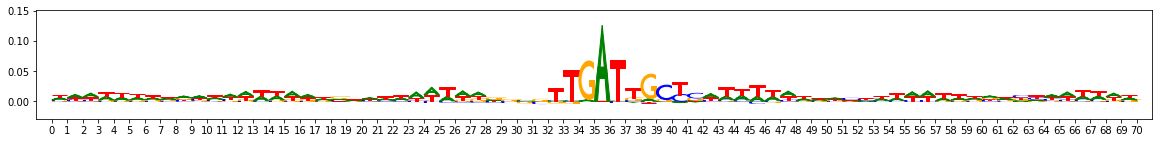

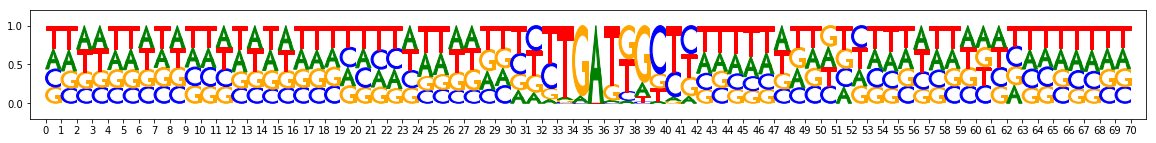

pattern idx 1
2215


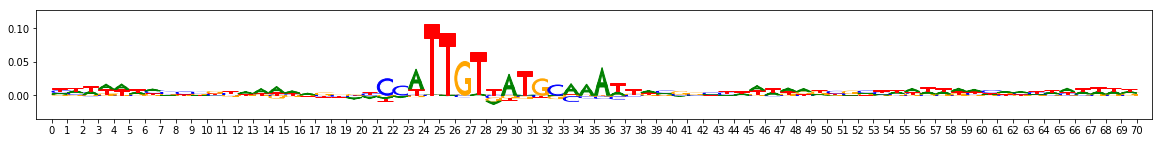

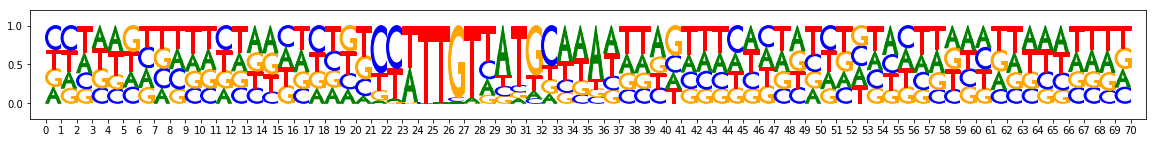

pattern idx 2
1854


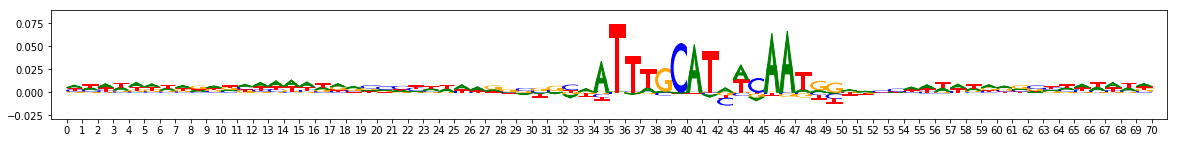

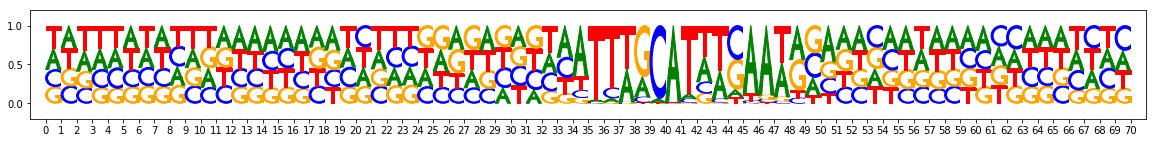

pattern idx 3
1636


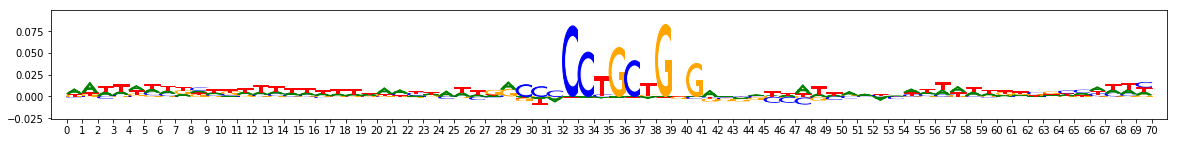

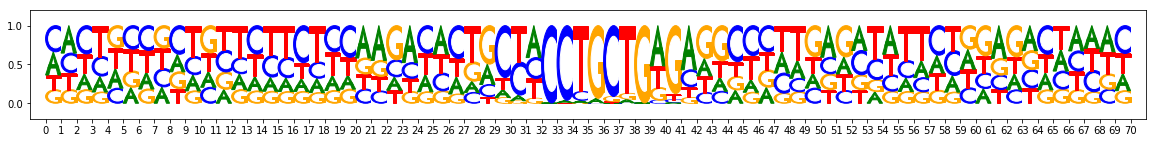

pattern idx 4
937


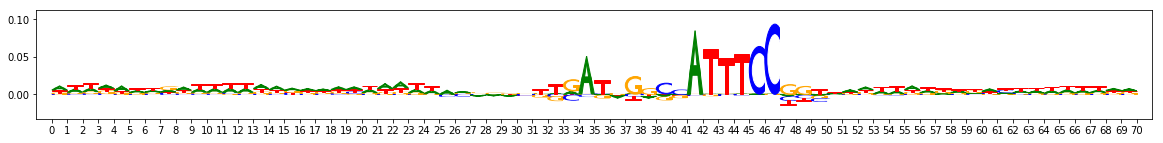

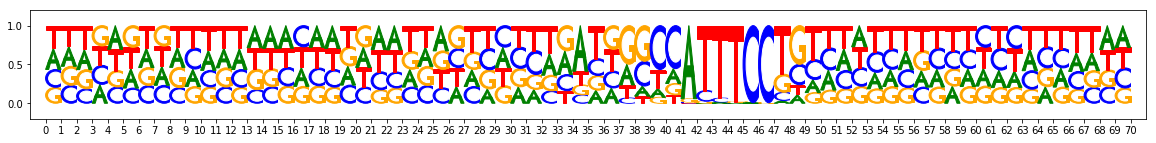

pattern idx 5
749


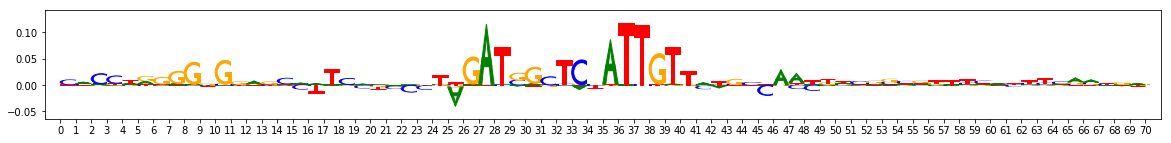

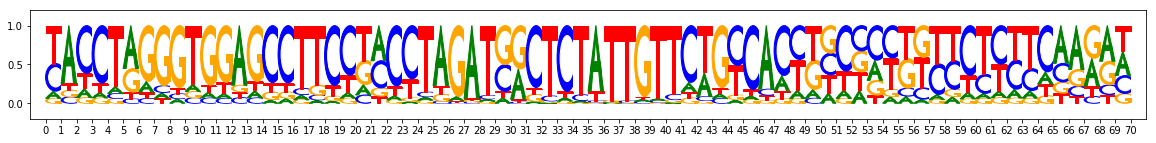

pattern idx 6
466


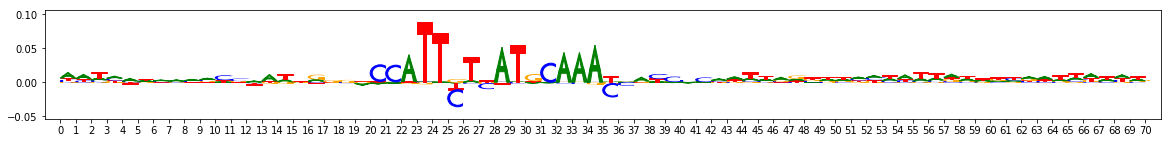

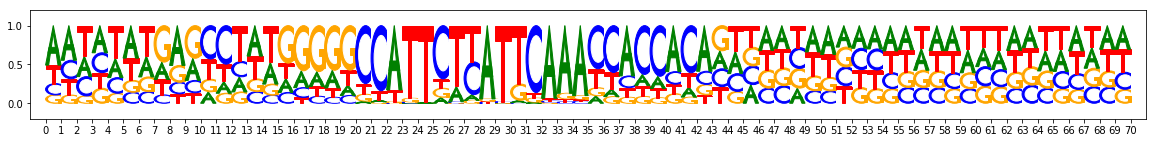

pattern idx 7
231


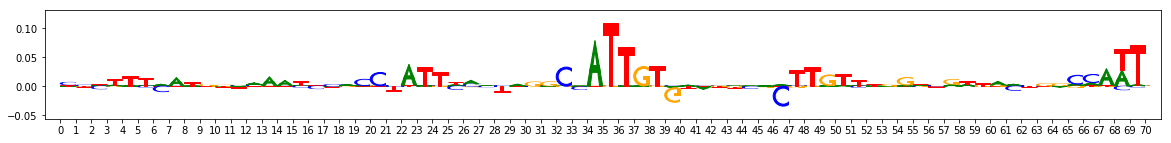

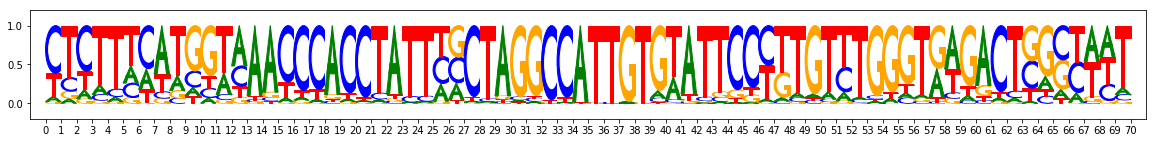

pattern idx 8
191


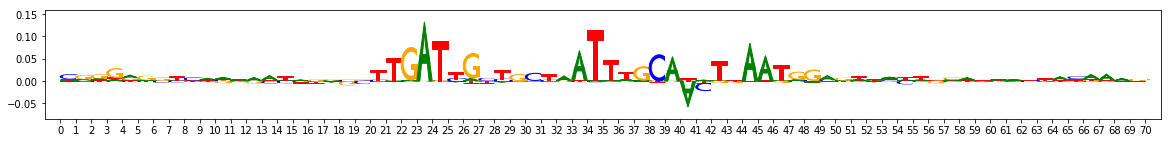

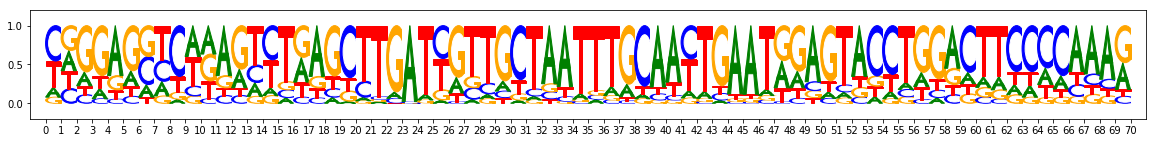

pattern idx 9
187


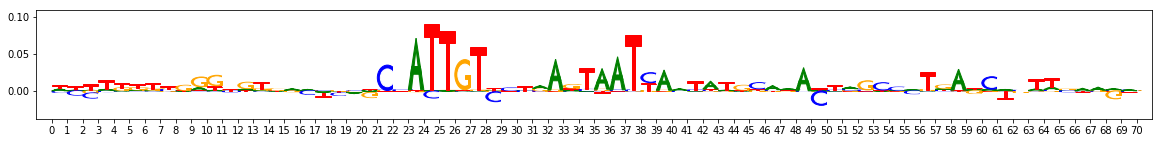

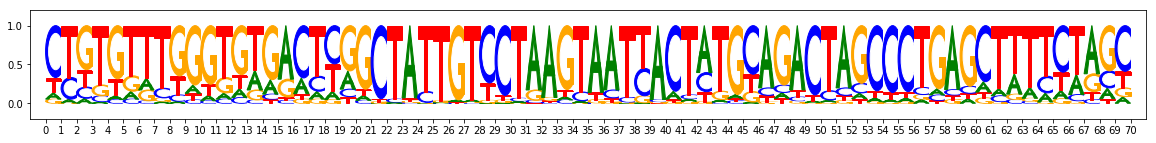

pattern idx 10
142


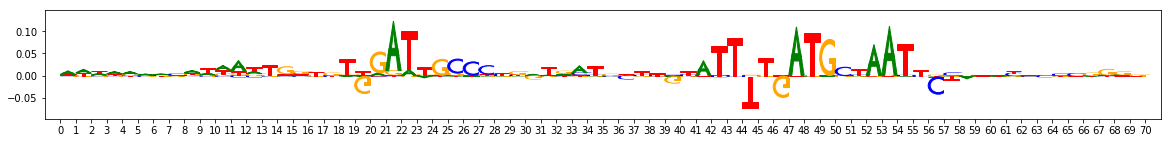

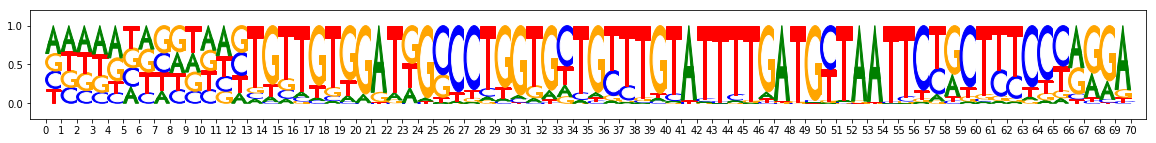

pattern idx 11
117


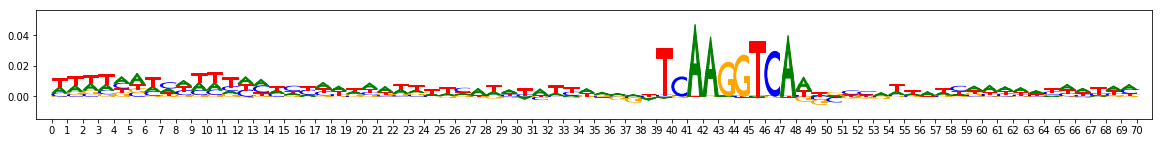

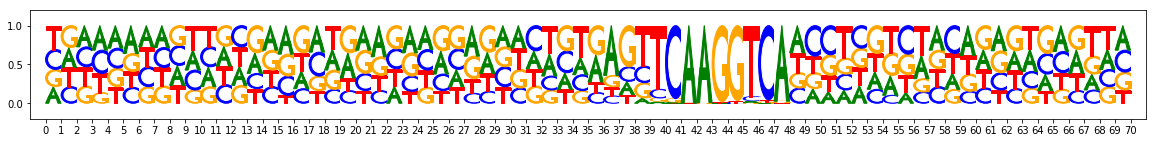

pattern idx 12
89


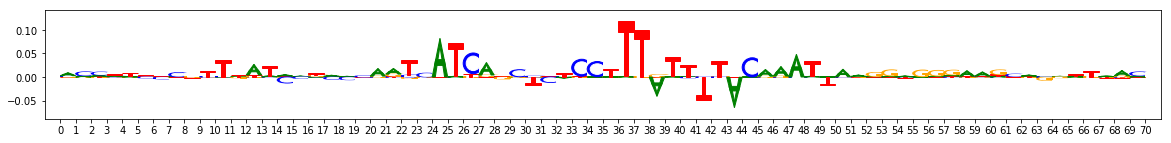

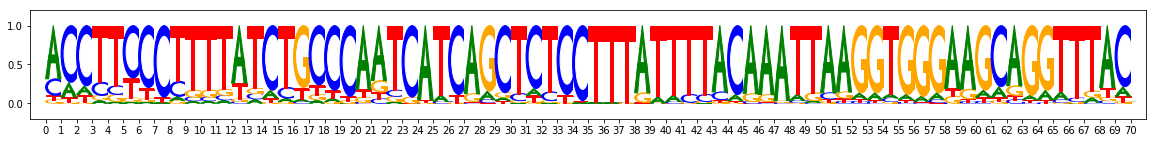

pattern idx 13
105


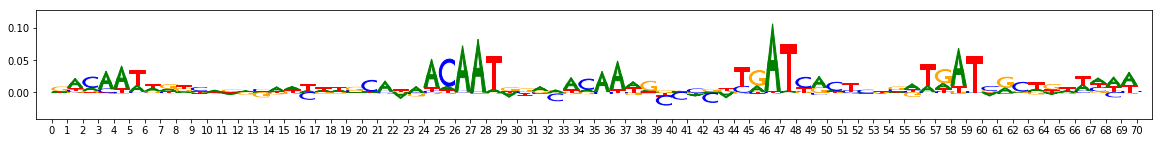

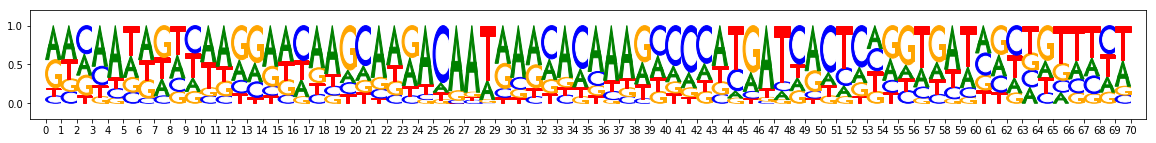

pattern idx 14
105


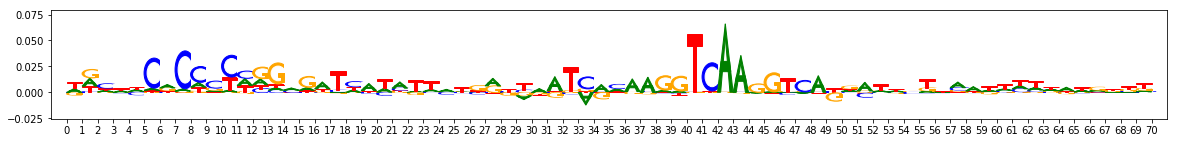

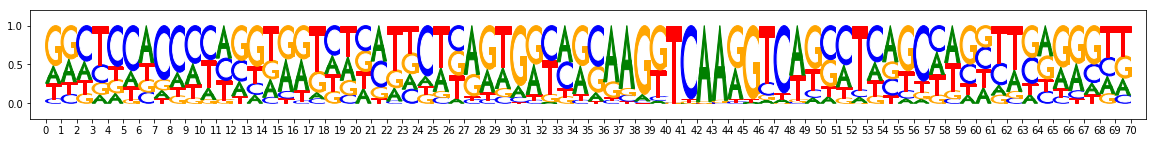

pattern idx 15
65


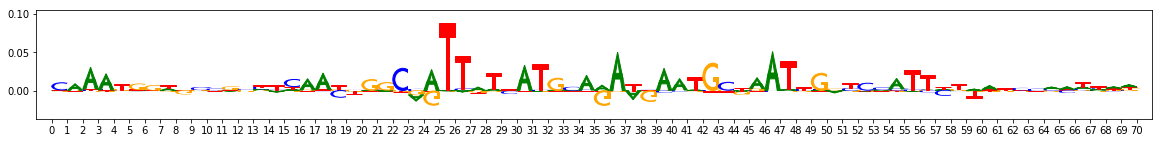

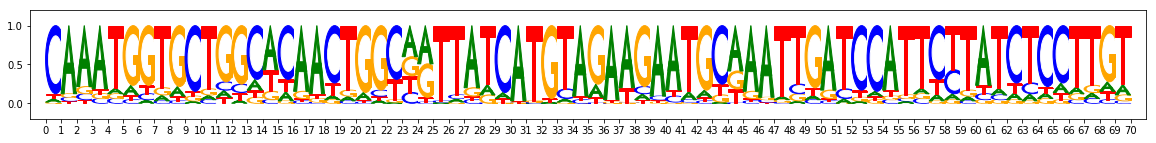

In [3]:
#visualize the patterns:
%matplotlib inline
from modisco.visualization import viz_sequence
for idx,pattern in enumerate(patterns):
    print("pattern idx",idx)
    print(len(pattern.seqlets))
    viz_sequence.plot_weights(
        pattern["Nanog_profile_wn_contrib_scores"].fwd)
    viz_sequence.plot_weights(pattern["sequence"].fwd)

TF-MoDISco is using the TensorFlow backend.


MEMORY 7.941636096
On task Nanog_profile_wn
Computing windowed sums on original
Generating null dist
peak(mu)= 0.00754788601747714
Computing threshold
Thresholds from null dist were -0.026598811149597168  and  0.2509317398071289
Passing windows frac was 0.04676685078463518 , which is above  0.03 ; adjusting
Final raw thresholds are -0.3184376752376554  and  0.3184376752376554
Final transformed thresholds are -0.9699999852203116  and  0.9699999852203116


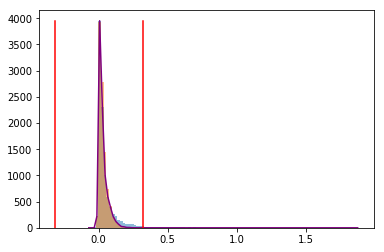

Got 98300 coords
After resolving overlaps, got 98300 seqlets
Across all tasks, the weakest transformed threshold used was: 0.9699998852203117
MEMORY 9.29497088
98300 identified in total
1 activity patterns with support >= 2000 out of 3 possible patterns
Metacluster sizes:  [98297]
Idx to activities:  {0: '1'}
MEMORY 9.295241216
On metacluster 0
Metacluster size 98297 limited to 50000
Relevant tasks:  ('Nanog_profile_wn',)
Relevant signs:  (1,)
TfModiscoSeqletsToPatternsFactory: seed=1234
(Round 1) num seqlets: 50000
(Round 1) Computing coarse affmat
MEMORY 9.295638528
Beginning embedding computation
Computing embeddings
Finished embedding computation in 88.27 s
Starting affinity matrix computations
Normalization computed in 78.04 s
Cosine similarity mat computed in 4405.63 s
Normalization computed in 78.7 s
Cosine similarity mat computed in 4298.24 s
Finished affinity matrix computations in 8775.56 s
(Round 1) Compute nearest neighbors from coarse affmat
MEMORY 35.905343488
Computed ne

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   14.3s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   22.1s
[Parallel(n_jobs=10)]: Done 200 out of 200 | elapsed:   23.2s finished


Louvain completed 200 runs in 188.01250529289246 seconds
Wrote graph to binary file in 59.19986343383789 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.767388
After 2 runs, maximum modularity is Q = 0.76792
After 3 runs, maximum modularity is Q = 0.784572
After 5 runs, maximum modularity is Q = 0.784605
After 11 runs, maximum modularity is Q = 0.785012
After 37 runs, maximum modularity is Q = 0.7861
Louvain completed 87 runs in 327.0731797218323 seconds
Preproc + Louvain took 593.0914697647095 s
Got 30 clusters after round 1
Counts:
{5: 1124, 6: 797, 4: 1525, 0: 3016, 15: 258, 12: 315, 1: 2134, 10: 339, 19: 96, 3: 1761, 2: 1845, 17: 130, 9: 457, 8: 475, 16: 232, 7: 477, 11: 318, 29: 17, 14: 269, 21: 74, 13: 296, 18: 108, 25: 42, 20: 81, 28: 17, 22: 65, 26: 28, 24: 42, 23: 46, 27: 20}
MEMORY 36.06652928
(Round 1) Aggregating seqlets in each cluster
MEMORY 36.06652928
Aggregating for cluster 0 with 3016 seqlets
MEMORY 36.06652928
Trimmed 74 out 

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   10.3s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   17.8s
[Parallel(n_jobs=10)]: Done 200 out of 200 | elapsed:   18.8s finished


Louvain completed 200 runs in 137.35805988311768 seconds
Wrote graph to binary file in 50.487942695617676 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.746332
After 10 runs, maximum modularity is Q = 0.746643
After 24 runs, maximum modularity is Q = 0.746858
After 29 runs, maximum modularity is Q = 0.748566
Louvain completed 79 runs in 222.8607575893402 seconds
Preproc + Louvain took 425.82668900489807 s
Got 32 clusters after round 2
Counts:
{0: 2162, 1: 2057, 28: 29, 5: 1048, 20: 106, 3: 1751, 4: 1591, 15: 169, 2: 1849, 29: 28, 22: 79, 7: 475, 27: 33, 23: 76, 18: 154, 6: 687, 19: 107, 13: 192, 10: 252, 12: 198, 24: 73, 14: 180, 16: 169, 21: 101, 26: 42, 9: 288, 11: 215, 17: 162, 25: 54, 8: 356, 31: 16, 30: 17}
MEMORY 26.95559168
(Round 2) Aggregating seqlets in each cluster
MEMORY 26.95559168
Aggregating for cluster 0 with 2162 seqlets
MEMORY 26.955329536
Trimmed 286 out of 2162
Aggregating for cluster 1 with 2057 seqlets
MEMORY 26.962378752

Similarity is 0.79266745; is_dissimilar is True
Inspecting for spurious merging
Wrote graph to binary file in 0.033560752868652344 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.00435576
After 2 runs, maximum modularity is Q = 0.00435577
Louvain completed 22 runs in 11.267322301864624 seconds
Similarity is 0.85146403; is_dissimilar is False
Got 4 subclusters
Inspecting for spurious merging
Wrote graph to binary file in 0.047659873962402344 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.0119382
Louvain completed 21 runs in 9.623557806015015 seconds
Similarity is 0.85695714; is_dissimilar is False
Inspecting for spurious merging
Wrote graph to binary file in 0.07413506507873535 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.0159736
Louvain completed 21 runs in 10.20802354812622 seconds
Similarity is 0.9272564; is_dissimilar is False
Inspecting for spurious merg

In [6]:
from importlib import reload

import h5py
import numpy as np
%matplotlib inline

import h5py
import numpy as np
import modisco
import modisco.cluster.phenograph.core
reload(modisco.cluster.phenograph.core)
import modisco.cluster.phenograph.cluster
reload(modisco.cluster.phenograph.cluster)
import modisco.cluster.phenograph
reload(modisco.cluster.phenograph)
import modisco.cluster.core
reload(modisco.cluster.core)
import modisco.cluster
reload(modisco.cluster)
import modisco.affinitymat.core
reload(modisco.affinitymat.core)
import modisco.affinitymat.transformers
reload(modisco.affinitymat.transformers)
import modisco.tfmodisco_workflow.seqlets_to_patterns
reload(modisco.tfmodisco_workflow.seqlets_to_patterns)
import modisco.tfmodisco_workflow.workflow
reload(modisco.tfmodisco_workflow.workflow)
import modisco.backend
reload(modisco.backend.tensorflow_backend)
reload(modisco.backend)
import modisco.nearest_neighbors
reload(modisco.nearest_neighbors)
import modisco.affinitymat
import modisco.aggregator
reload(modisco.aggregator)
import modisco.value_provider
reload(modisco.value_provider)
import modisco.core
reload(modisco.core)
import modisco.coordproducers
reload(modisco.coordproducers)
import modisco.metaclusterers
reload(modisco.metaclusterers)

%matplotlib inline

workflow = modisco.tfmodisco_workflow.workflow.TfModiscoWorkflow(
    sliding_window_size=21,
    flank_size=10,
    target_seqlet_fdr=0.01,
    min_passing_windows_frac=0.03,
    max_passing_windows_frac=0.03,
    min_metacluster_size=2000,
    min_metacluster_size_frac=0.02,
    max_seqlets_per_metacluster=50000,
    seqlets_to_patterns_factory=
      modisco.tfmodisco_workflow.seqlets_to_patterns.TfModiscoSeqletsToPatternsFactory(
        trim_to_window_size=30,
        initial_flank_to_add=10,
        kmer_len=8,
        num_gaps=3,
        num_mismatches=2,
        n_cores=10,
        final_min_cluster_size=60
    )
)

results = workflow(
    task_names=["Nanog_profile_wn"],
    contrib_scores={'Nanog_profile_wn': nanog_profile_wn_contribs},
    hypothetical_contribs={'Nanog_profile_wn': nanog_profile_wn_hypimp},
    one_hot=onehot_seq)

In [7]:
import h5py
import modisco.util
reload(modisco.util)
!rm presparserun_l8g3m2_results.hdf5
grp = h5py.File("presparserun_l8g3m2_results.hdf5")
results.save_hdf5(grp)
grp.close()

rm: cannot remove 'presparserun_l8g3m2_results.hdf5': No such file or directory


metacluster_0
activity pattern: [1]
metacluster_0 pattern_0
total seqlets: 3317
Task 0 hypothetical scores:


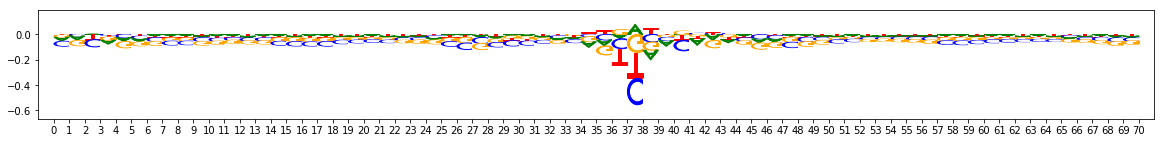

Task 0 actual importance scores:


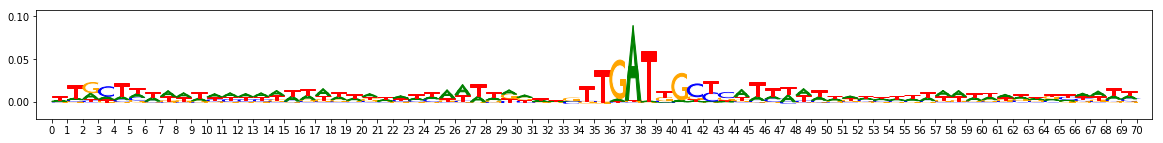

onehot, fwd and rev:


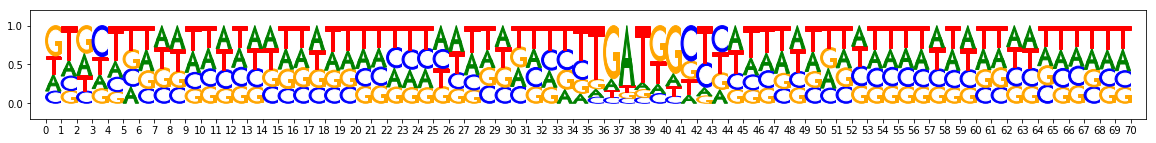

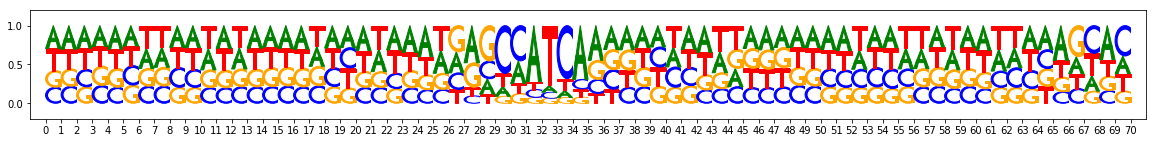

metacluster_0 pattern_1
total seqlets: 2061
Task 0 hypothetical scores:


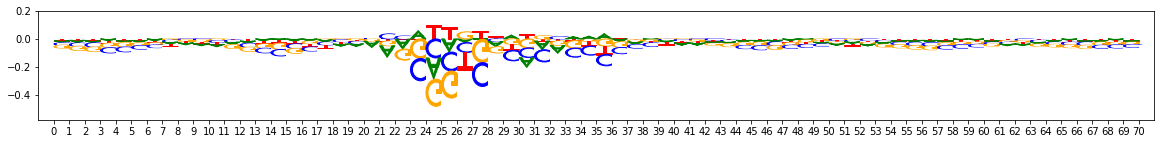

Task 0 actual importance scores:


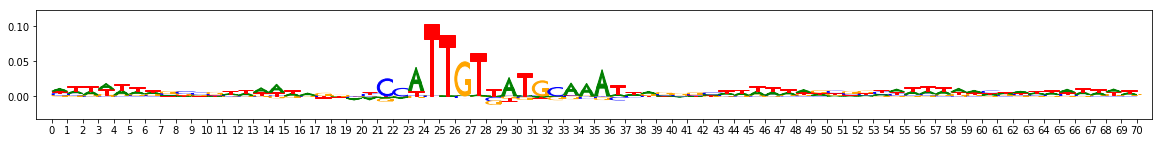

onehot, fwd and rev:


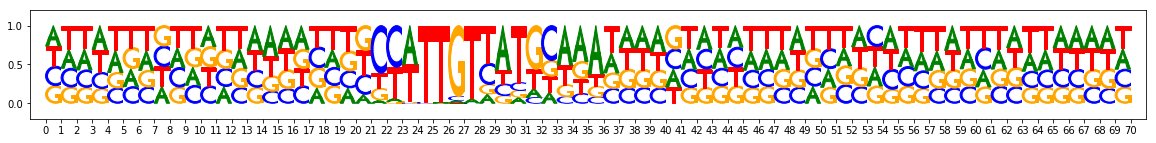

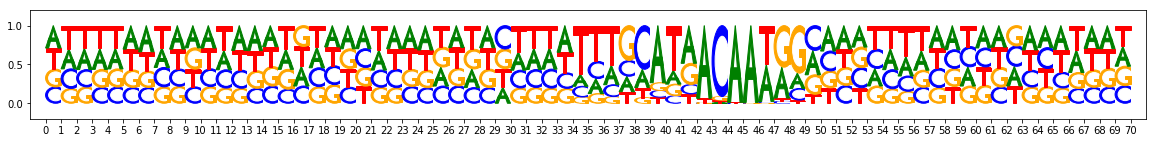

metacluster_0 pattern_2
total seqlets: 1814
Task 0 hypothetical scores:


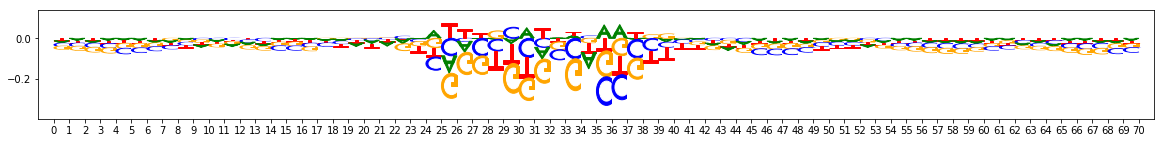

Task 0 actual importance scores:


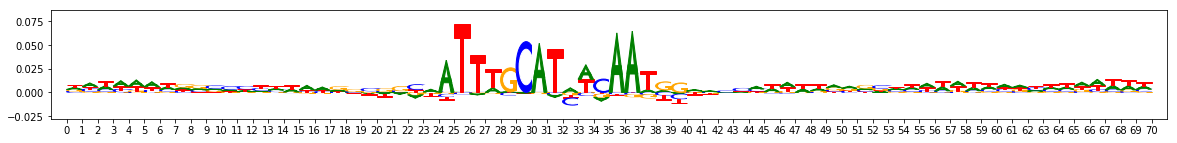

onehot, fwd and rev:


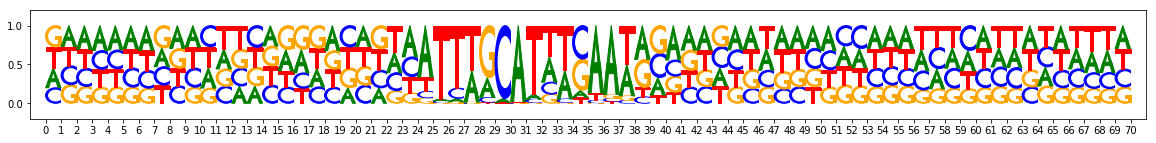

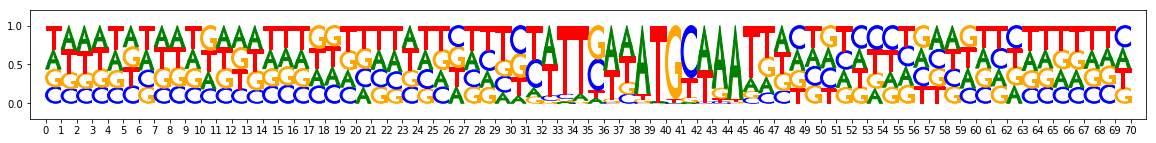

metacluster_0 pattern_3
total seqlets: 1678
Task 0 hypothetical scores:


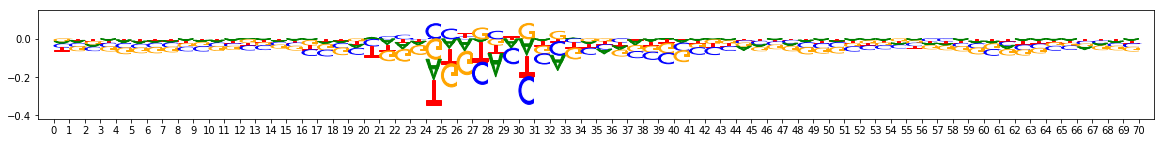

Task 0 actual importance scores:


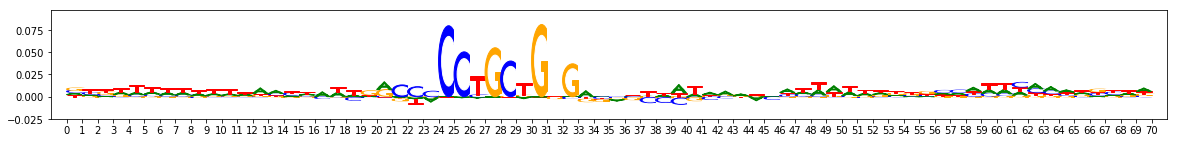

onehot, fwd and rev:


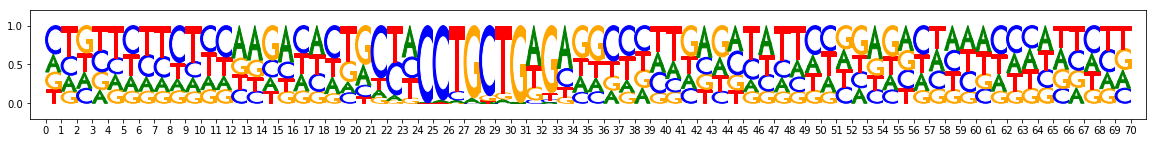

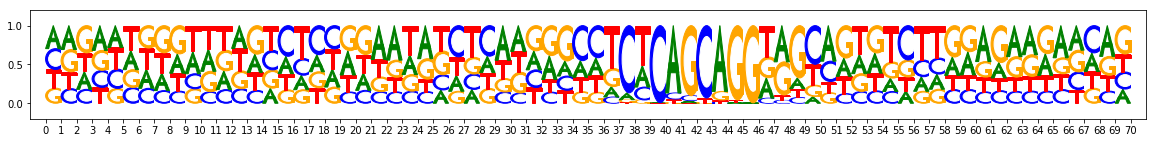

metacluster_0 pattern_4
total seqlets: 945
Task 0 hypothetical scores:


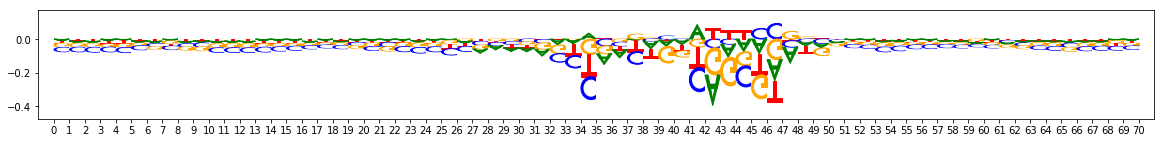

Task 0 actual importance scores:


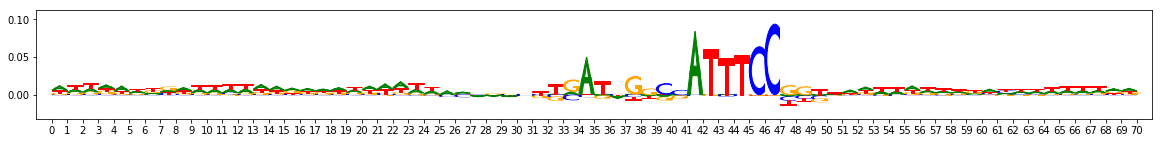

onehot, fwd and rev:


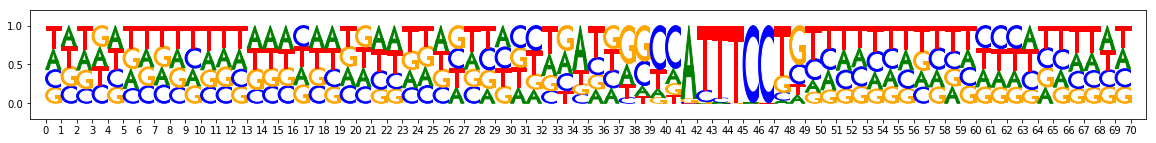

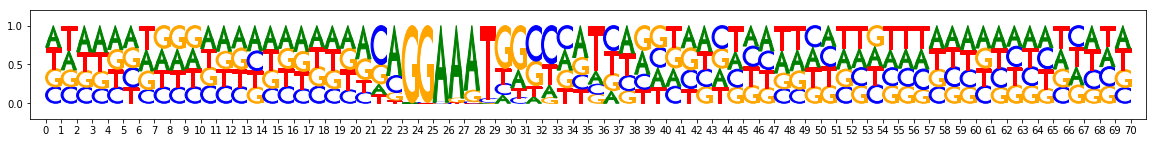

metacluster_0 pattern_5
total seqlets: 710
Task 0 hypothetical scores:


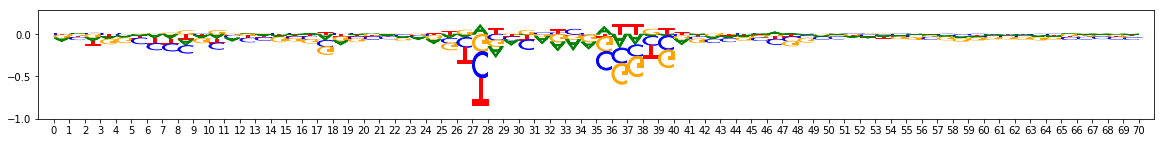

Task 0 actual importance scores:


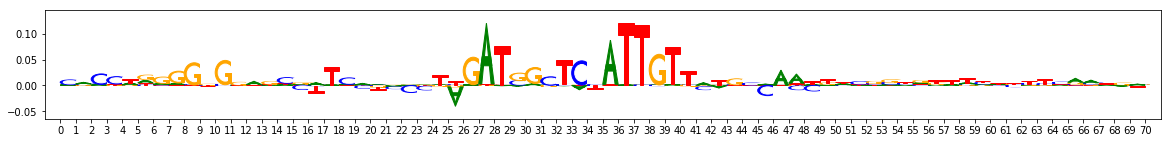

onehot, fwd and rev:


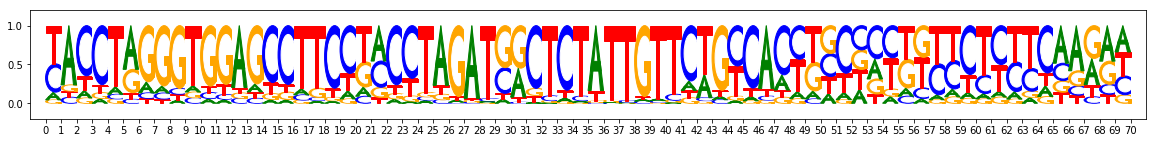

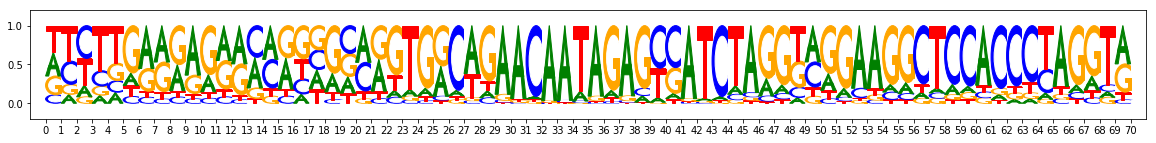

metacluster_0 pattern_6
total seqlets: 458
Task 0 hypothetical scores:


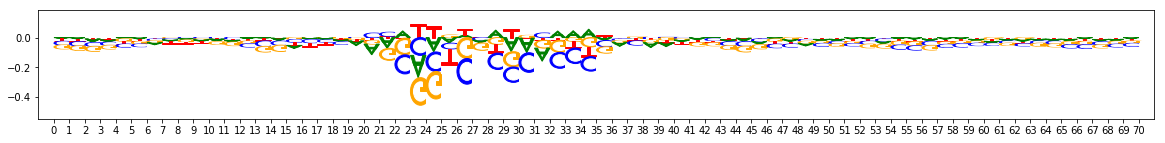

Task 0 actual importance scores:


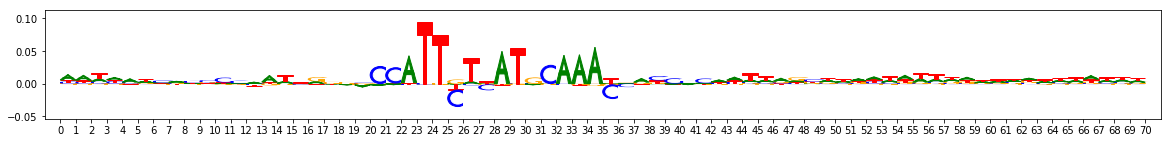

onehot, fwd and rev:


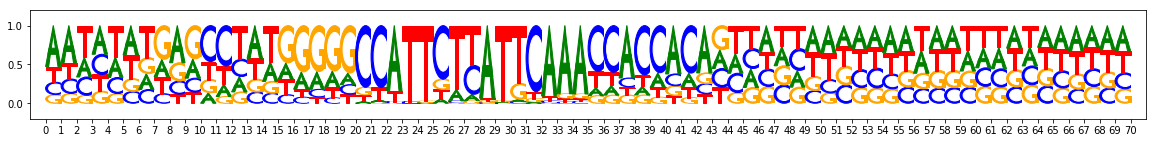

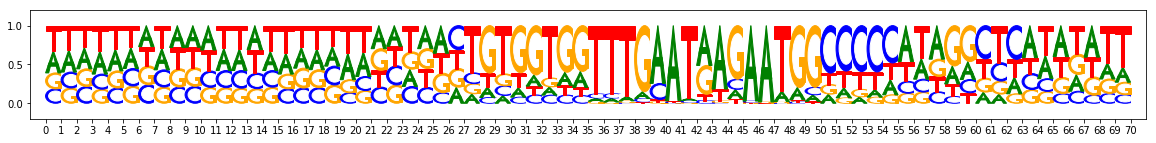

metacluster_0 pattern_7
total seqlets: 206
Task 0 hypothetical scores:


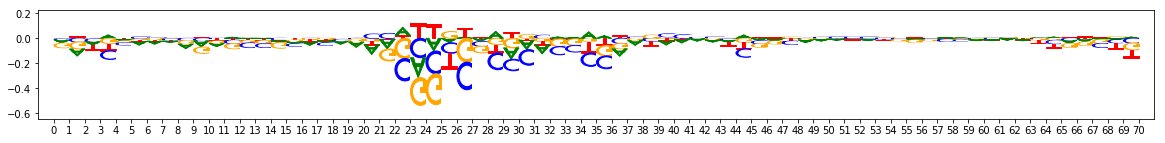

Task 0 actual importance scores:


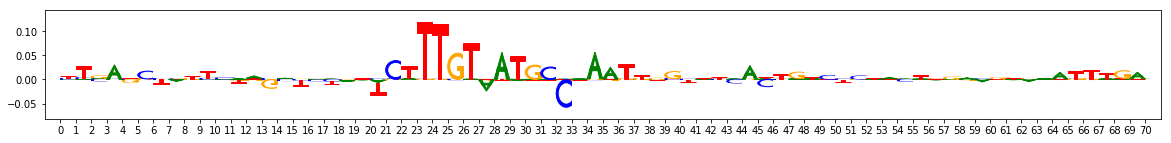

onehot, fwd and rev:


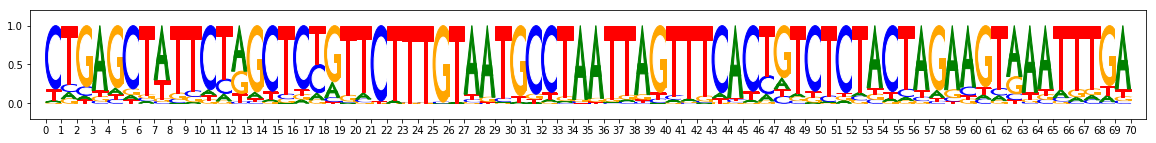

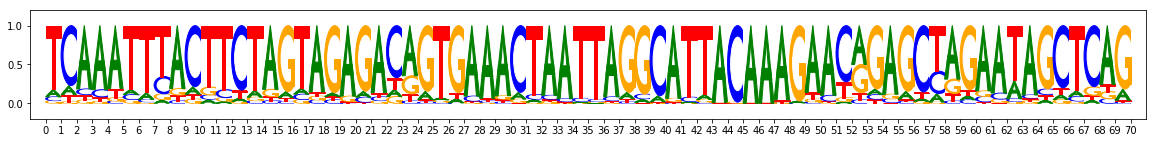

metacluster_0 pattern_8
total seqlets: 184
Task 0 hypothetical scores:


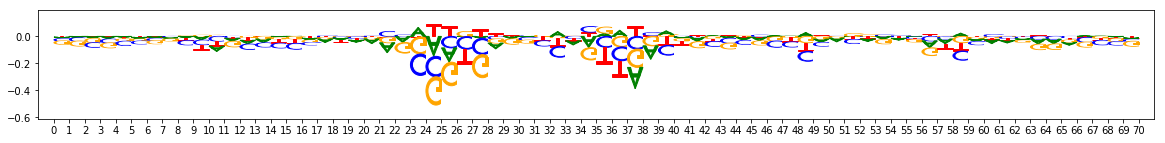

Task 0 actual importance scores:


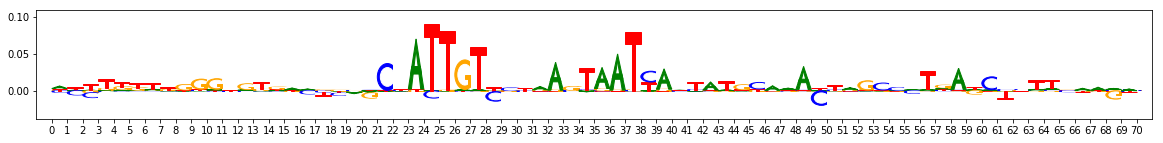

onehot, fwd and rev:


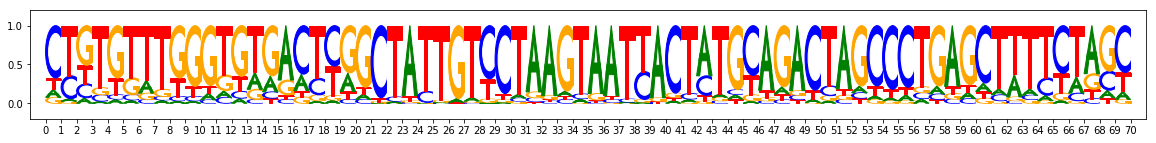

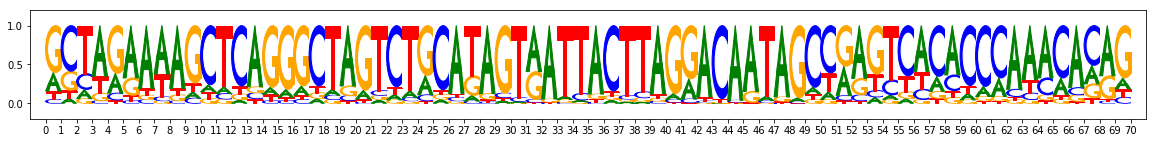

metacluster_0 pattern_9
total seqlets: 180
Task 0 hypothetical scores:


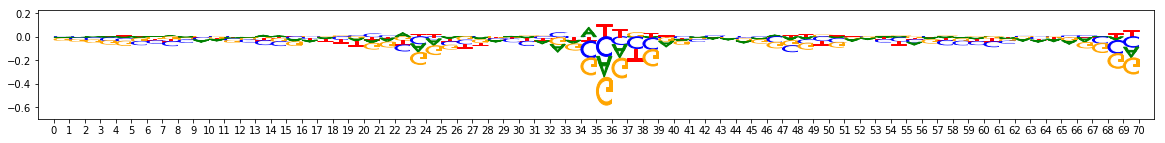

Task 0 actual importance scores:


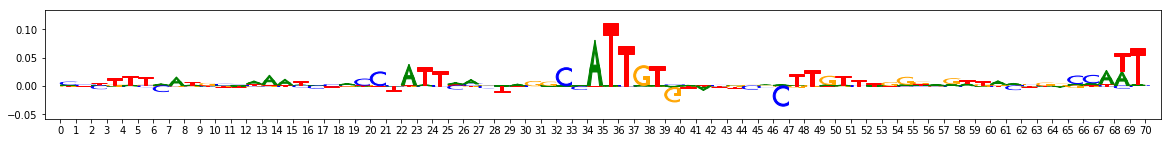

onehot, fwd and rev:


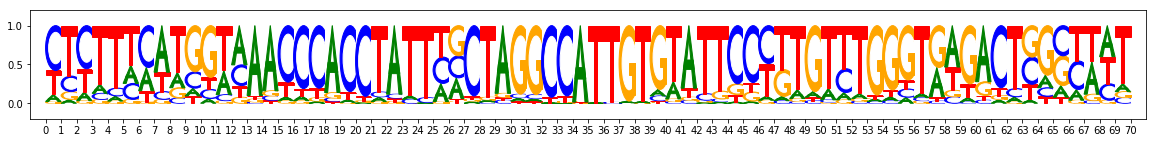

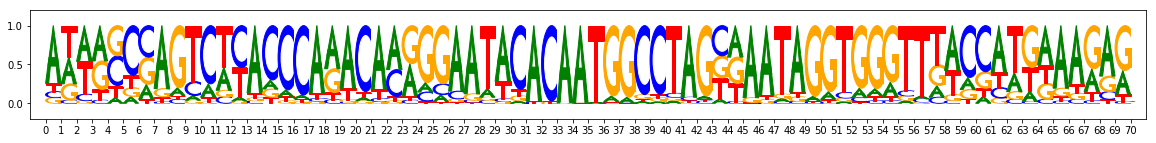

metacluster_0 pattern_10
total seqlets: 157
Task 0 hypothetical scores:


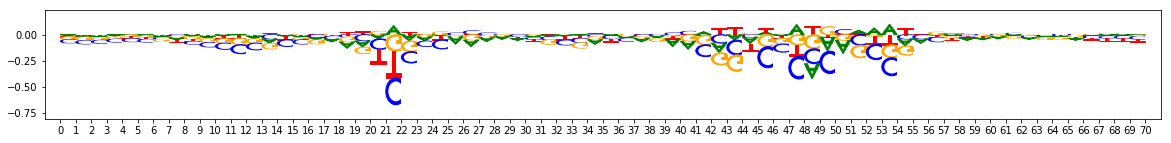

Task 0 actual importance scores:


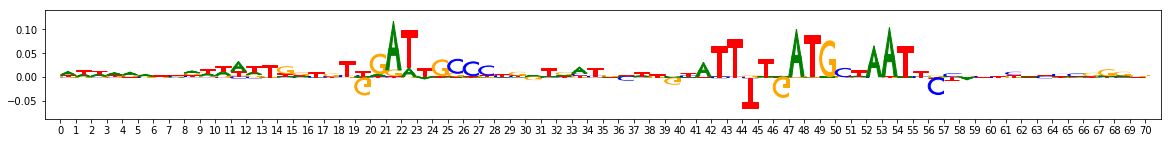

onehot, fwd and rev:


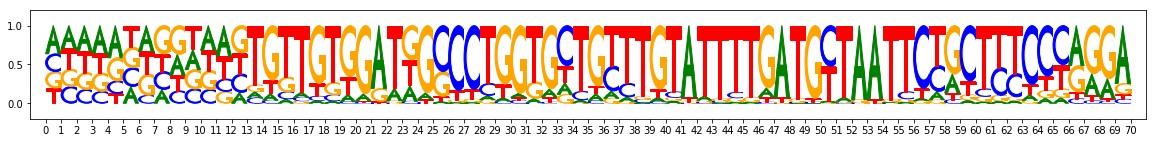

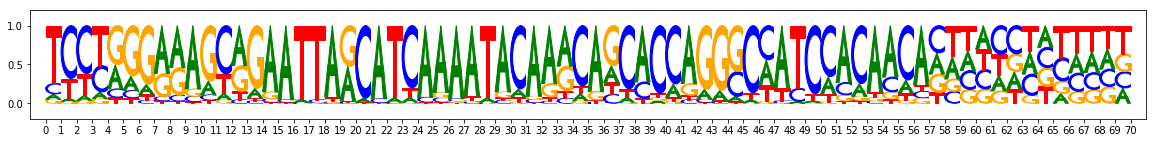

metacluster_0 pattern_11
total seqlets: 148
Task 0 hypothetical scores:


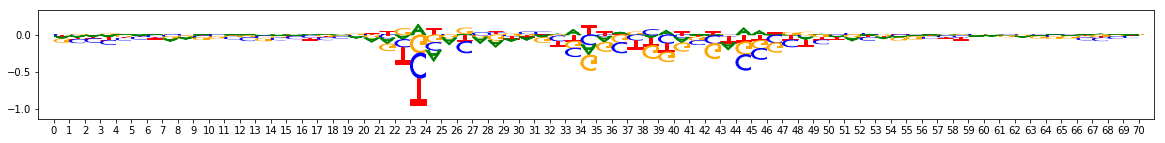

Task 0 actual importance scores:


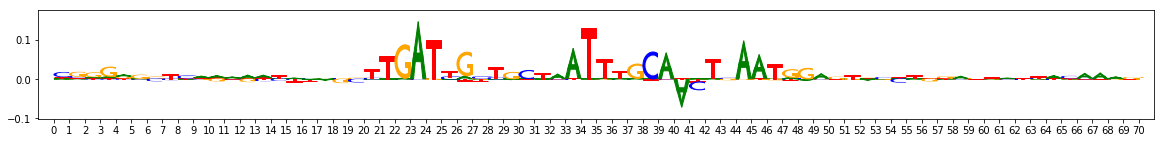

onehot, fwd and rev:


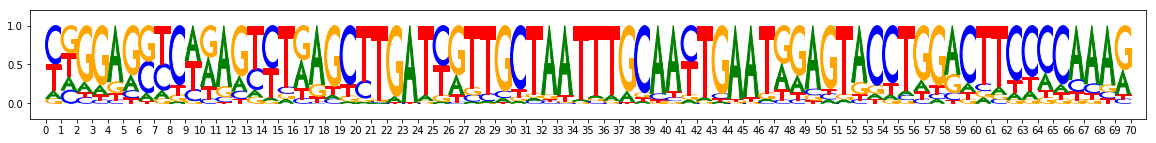

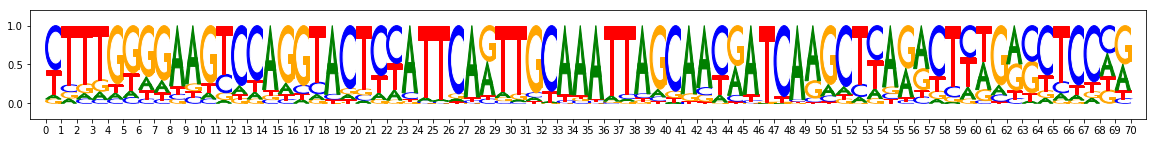

metacluster_0 pattern_12
total seqlets: 100
Task 0 hypothetical scores:


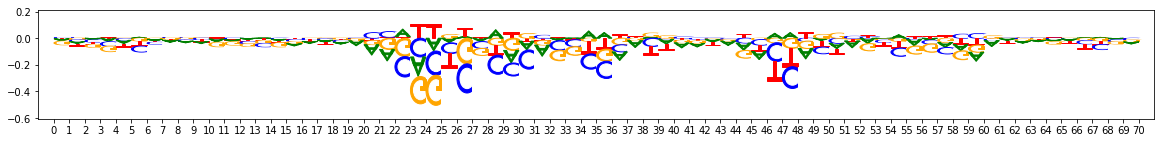

Task 0 actual importance scores:


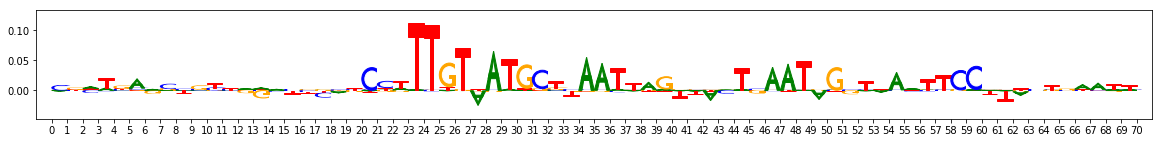

onehot, fwd and rev:


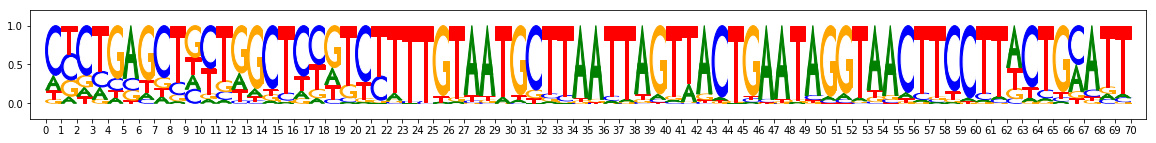

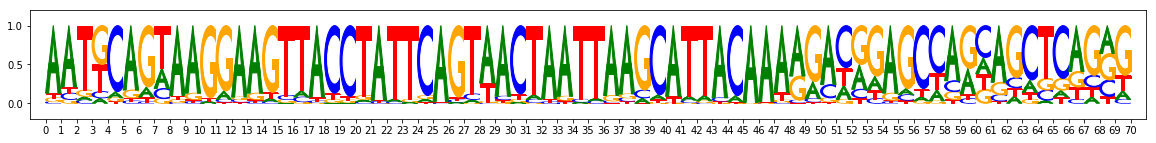

metacluster_0 pattern_13
total seqlets: 130
Task 0 hypothetical scores:


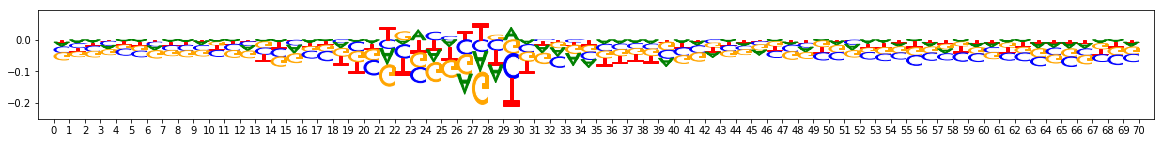

Task 0 actual importance scores:


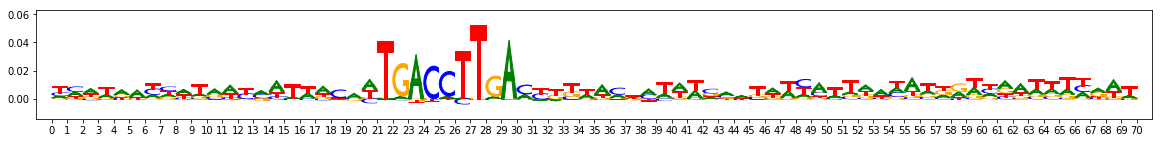

onehot, fwd and rev:


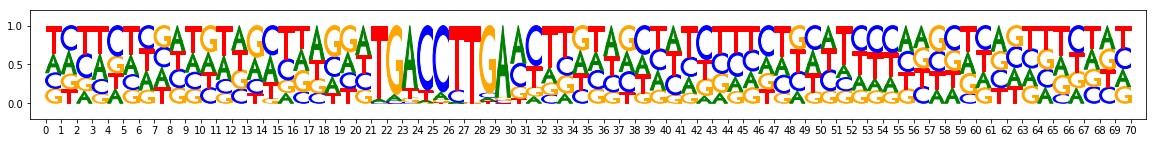

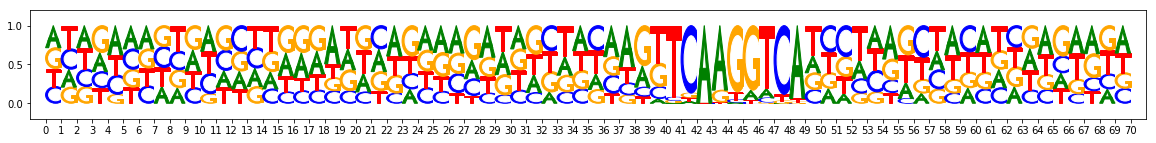

metacluster_0 pattern_14
total seqlets: 85
Task 0 hypothetical scores:


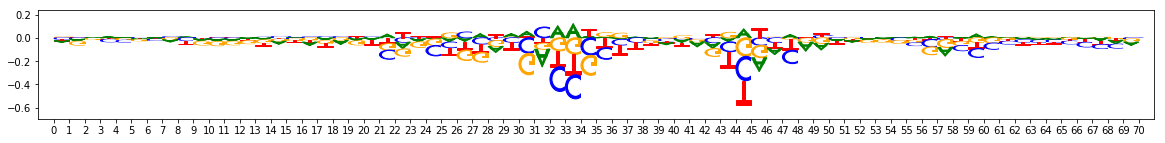

Task 0 actual importance scores:


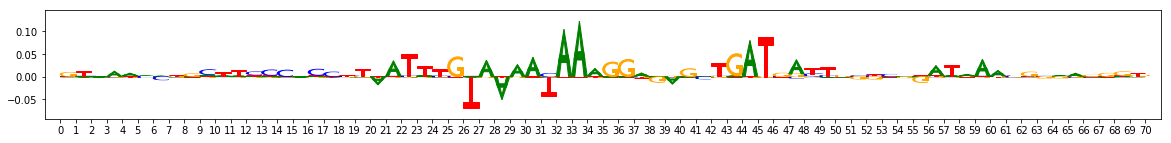

onehot, fwd and rev:


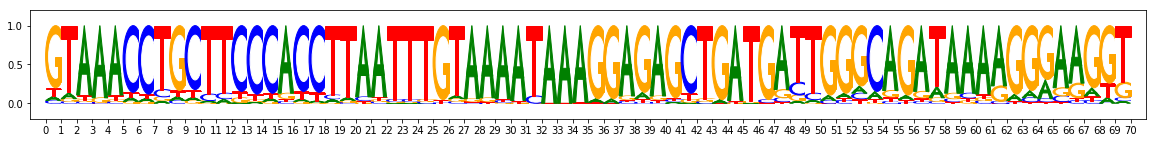

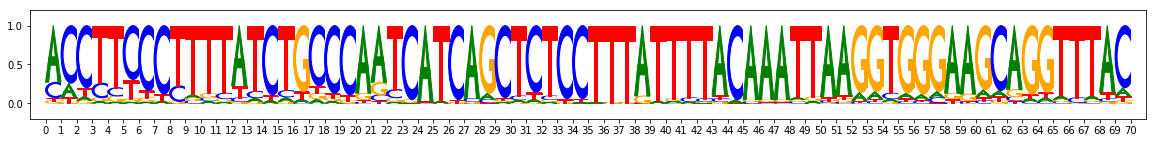

metacluster_0 pattern_15
total seqlets: 92
Task 0 hypothetical scores:


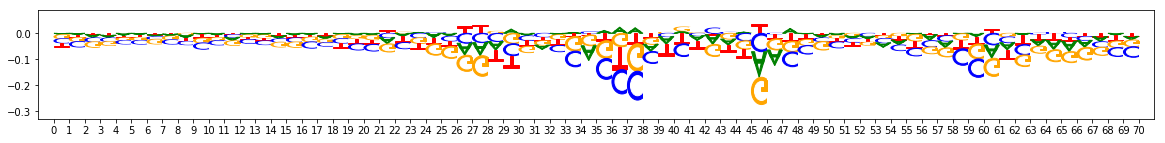

Task 0 actual importance scores:


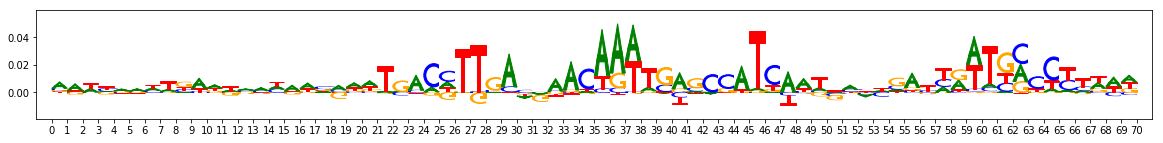

onehot, fwd and rev:


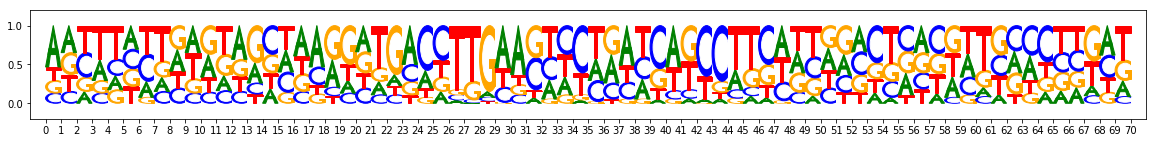

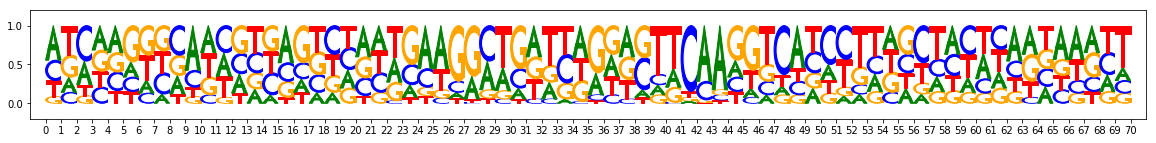

metacluster_0 pattern_16
total seqlets: 124
Task 0 hypothetical scores:


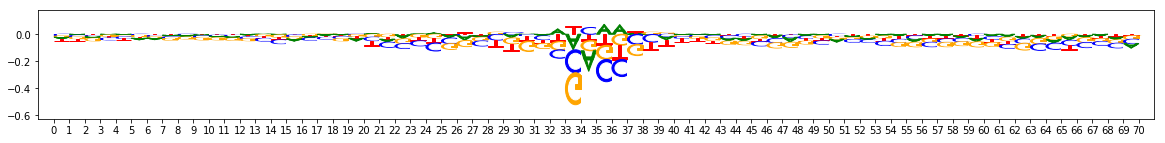

Task 0 actual importance scores:


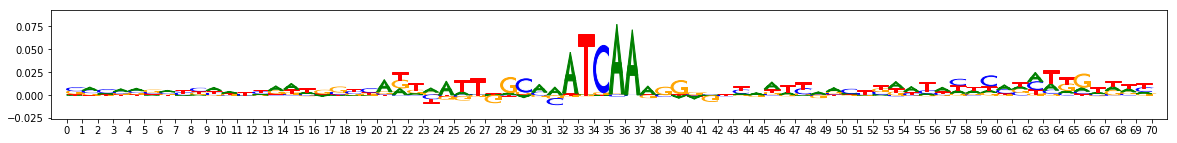

onehot, fwd and rev:


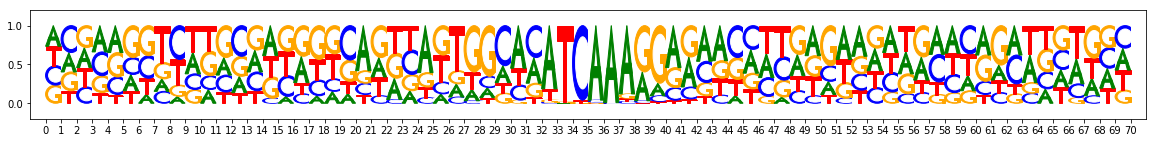

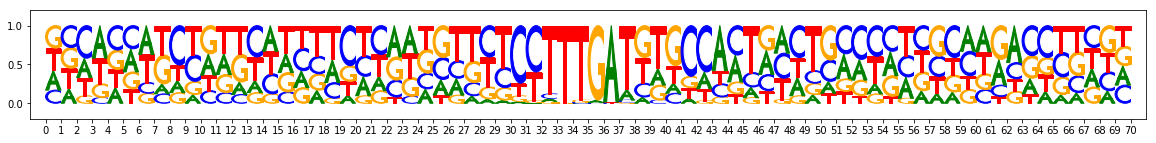

metacluster_0 pattern_17
total seqlets: 97
Task 0 hypothetical scores:


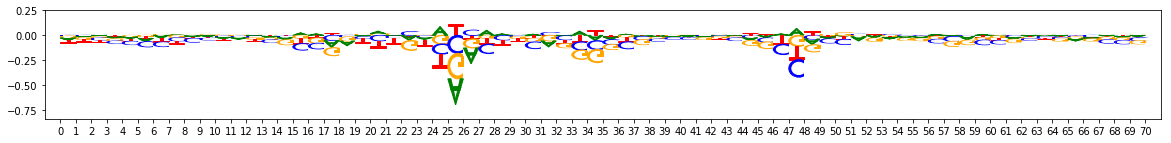

Task 0 actual importance scores:


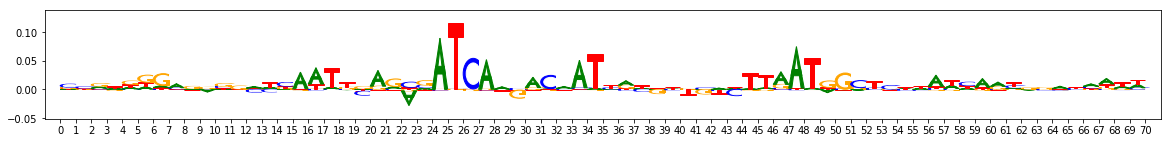

onehot, fwd and rev:


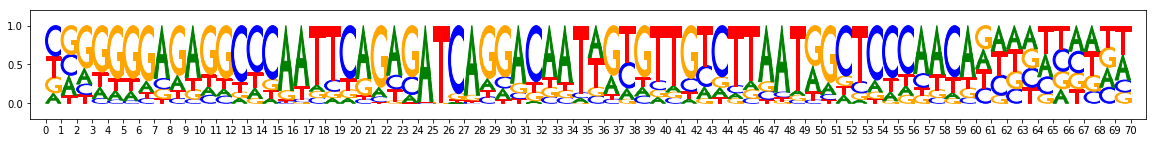

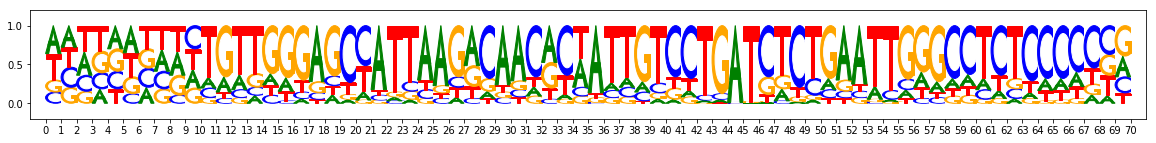

metacluster_0 pattern_18
total seqlets: 78
Task 0 hypothetical scores:


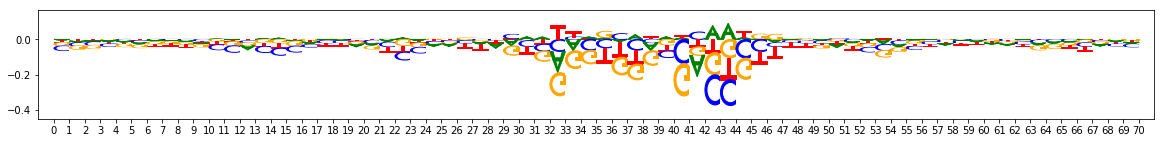

Task 0 actual importance scores:


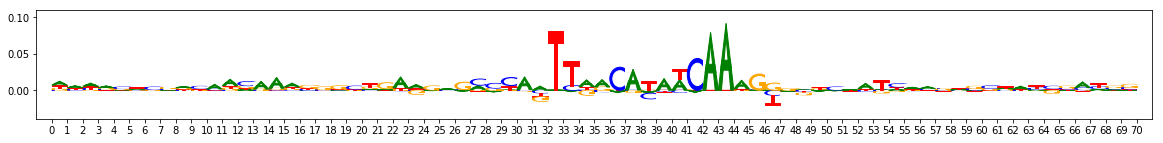

onehot, fwd and rev:


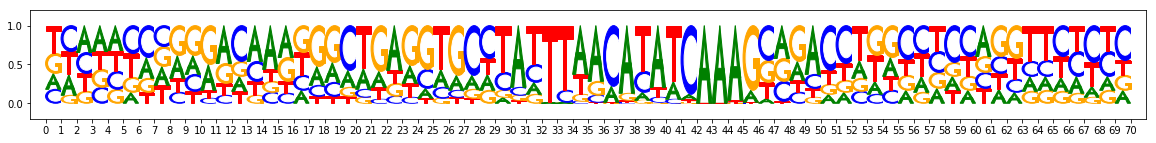

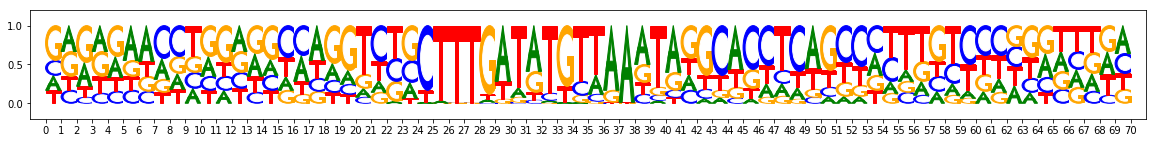

In [8]:
from modisco.visualization import viz_sequence

hdf5_results = h5py.File("presparserun_l8g3m2_results.hdf5","r")

metacluster_names = [
    x.decode("utf-8") for x in 
    list(hdf5_results["metaclustering_results"]
         ["all_metacluster_names"][:])]

all_patterns = []
background = np.array([0.27, 0.23, 0.23, 0.27])

for metacluster_name in metacluster_names:
    print(metacluster_name)
    metacluster_grp = (hdf5_results["metacluster_idx_to_submetacluster_results"]
                                   [metacluster_name])
    print("activity pattern:",metacluster_grp["activity_pattern"][:])
    all_pattern_names = [x.decode("utf-8") for x in 
                         list(metacluster_grp["seqlets_to_patterns_result"]
                                             ["patterns"]["all_pattern_names"][:])]
    if (len(all_pattern_names)==0):
        print("No motifs found for this activity pattern")
    for pattern_name in all_pattern_names:
        print(metacluster_name, pattern_name)
        all_patterns.append((metacluster_name, pattern_name))
        pattern = metacluster_grp["seqlets_to_patterns_result"]["patterns"][pattern_name]
        print("total seqlets:",len(pattern["seqlets_and_alnmts"]["seqlets"]))
        print("Task 0 hypothetical scores:")
        viz_sequence.plot_weights(pattern["Nanog_profile_wn_hypothetical_contribs"]["fwd"])
        print("Task 0 actual importance scores:")
        viz_sequence.plot_weights(pattern["Nanog_profile_wn_contrib_scores"]["fwd"])
        print("onehot, fwd and rev:")
        viz_sequence.plot_weights(np.array(pattern["sequence"]["fwd"])) 
        viz_sequence.plot_weights(np.array(pattern["sequence"]["rev"])) 
        
hdf5_results.close()